In [16]:
import gensim
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import umap
import matplotlib.pyplot as plt

In [38]:
spine = open("../data/processed/SPINE_word2vec.txt","r") .read().split('\n')
spine.pop(15000) # remove the last empty object
len(spine)

15000

In [42]:
spine_tokens = []
spine_embeddings = []

for i, line in enumerate(spine):
#     if i %100 == 0:
#         print("Processing:", i)
    tokens = line.strip().split()
    spine_tokens.append(tokens[0])
    spine_embeddings.append([float(i) for i in tokens[1:]])

In [43]:
spine_embeddings = np.array(spine_embeddings)
spine_tokens = np.array(spine_tokens)

## Find the most similar words in Table 1
- target words: ['mathematics', 'remote', 'internet']
- using the resulted embeddings after running our code

In [35]:
def find_top_dimension_inx(targ_word_embed, top_n_dim = 3):
    '''Return the index of top dimensions of a word, given its embedding'''
    # index of top participating dimensions
    top_dim_inx = np.abs(targ_word_embed).argsort()[-top_n_dim:][::-1] # absolute values
    top_dim_inx_sign = np.sign(targ_word_embed[top_dim_inx]) # get the sign of the values (1 or -1)
    return top_dim_inx, top_dim_inx_sign

def find_top_words(top_dim_inx, top_dim_inx_sign, spine_tokens, spine_embeddings, num_word = 4, toprint=False):
    '''Return the word list per highest scoring dimension of the target word'''
    word_list = []
    for dim_inx, sign in zip(top_dim_inx, top_dim_inx_sign):
        if sign > 0:
        # find the top participating word in each of the highest scoring dimension of the target word
            top_word_in_onedim_inx = np.argsort(spine_embeddings[:,dim_inx])[-num_word:][::-1] 
            if toprint:
                print("word:",spine_tokens[top_word_in_onedim_inx])
                print("embedding score:", spine_embeddings[:,dim_inx][top_word_in_onedim_inx])
            word_list.append(spine_tokens[top_word_in_onedim_inx])
        else: # negative values
            top_word_in_onedim_inx = np.argsort(spine_embeddings[:,dim_inx])[:num_word] 
            word_list.append(spine_tokens[top_word_in_onedim_inx])
            if toprint:
                print("word:",spine_tokens[top_word_in_onedim_inx])
                print("embedding score:", spine_embeddings[:,dim_inx][top_word_in_onedim_inx])

    return word_list

In [44]:
targ_words = ['mathematics', 'remote', 'internet']
# find the relative row of embeddings of the target words
targ_embeddings = [spine_embeddings[np.where(spine_tokens == word)[0][0]] for word in targ_words] 

In [45]:
for targ_word, targ_word_embed in zip(targ_words, targ_embeddings):
    top_dim_inx, top_dim_inx_sign = find_top_dimension_inx(targ_word_embed)
    word_list = find_top_words(top_dim_inx, top_dim_inx_sign, spine_tokens, spine_embeddings, num_word = 5)
    for mylist in word_list:
        print(f"{targ_word} is similar to: {mylist}")
    print("---")

mathematics is similar to: ['algebra' 'exam' 'courses' 'exams' 'math']
mathematics is similar to: ['theorem' 'mathematical' 'mathematician' 'equations' 'calculations']
mathematics is similar to: ['doctorate' 'professor' 'doctoral' 'lecturer' 'sociology']
---
remote is similar to: ['villages' 'hamlet' 'villagers' 'village' 'huts']
remote is similar to: ['mountainous' 'hilly' 'impoverished' 'poorest' 'populated']
remote is similar to: ['button' 'buttons' 'click' 'password' 'keyboard']
---
internet is similar to: ['hacker' 'spam' 'pornographic' 'cyber' 'pornography']
internet is similar to: ['browser' 'app' 'downloads' 'iphone' 'download']
internet is similar to: ['cellular' 'subscriber' 'verizon' 'broadband' 'subscribers']
---


**The result above shown that we replicated the result in Table 1 (SPINE w /word2vec)**

**Here are some heatmap visualizations we made to verify the dimensions and the matching words**

----
Embedding weight of the target word: [0.562832 0.343668 0.300605]
word: ['algebra' 'exam' 'courses' 'exams' 'math']
embedding score: [0.792442 0.644488 0.638213 0.626758 0.605511]
word: ['theorem' 'mathematical' 'mathematician' 'equations' 'calculations']
embedding score: [0.656374 0.575096 0.570976 0.566587 0.477592]
word: ['doctorate' 'professor' 'doctoral' 'lecturer' 'sociology']
embedding score: [1.       0.925088 0.868356 0.787881 0.73521 ]
----
Embedding weight of the target word: [0.196889 0.193542 0.191535]
word: ['villages' 'hamlet' 'villagers' 'village' 'huts']
embedding score: [0.379284 0.360515 0.346149 0.338625 0.325151]
word: ['mountainous' 'hilly' 'impoverished' 'poorest' 'populated']
embedding score: [0.306792 0.294408 0.29371  0.283175 0.279512]
word: ['button' 'buttons' 'click' 'password' 'keyboard']
embedding score: [0.642376 0.579787 0.474382 0.402363 0.364647]
----
Embedding weight of the target word: [0.464216 0.233811 0.219569]
word: ['hacker' 'spam' 'pornog

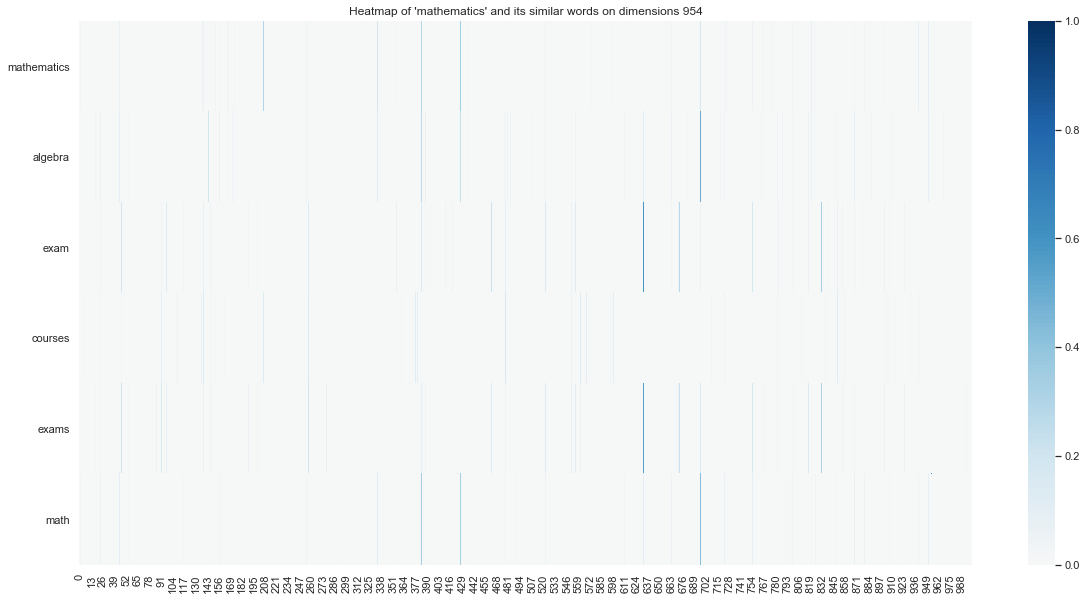

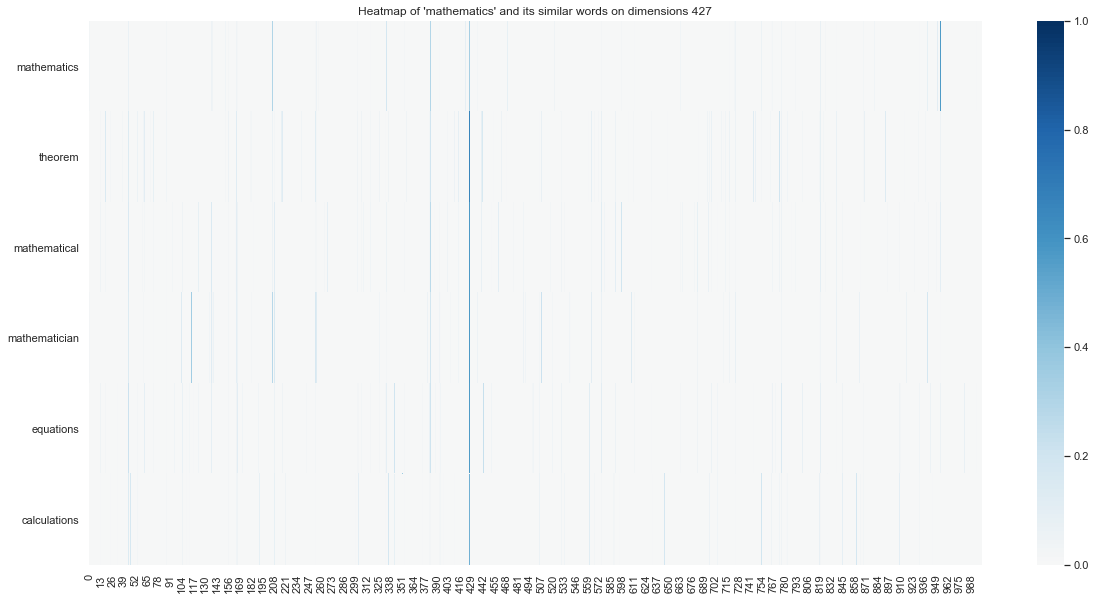

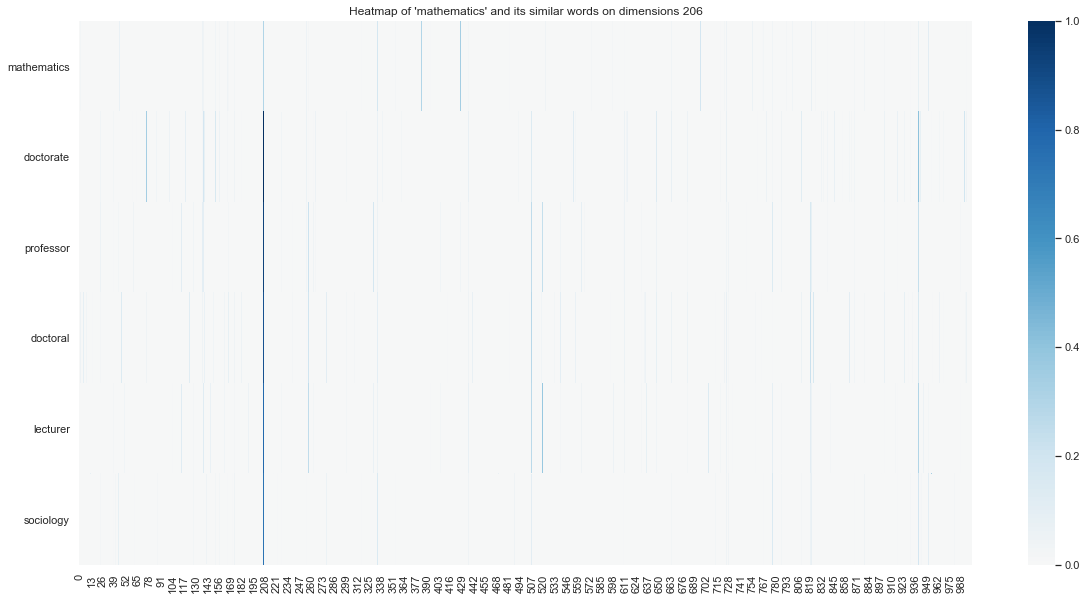

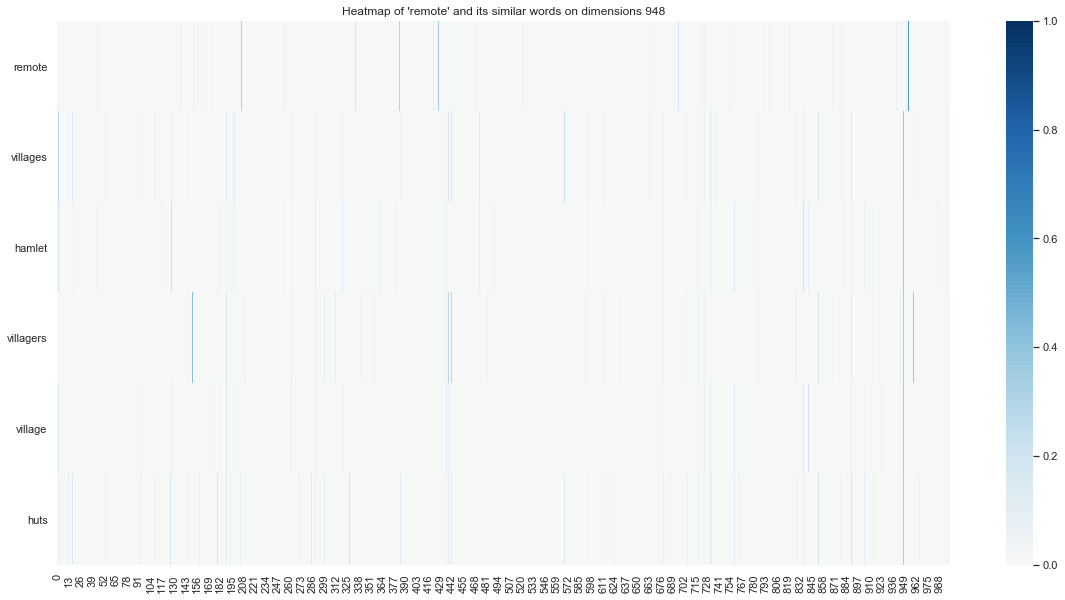

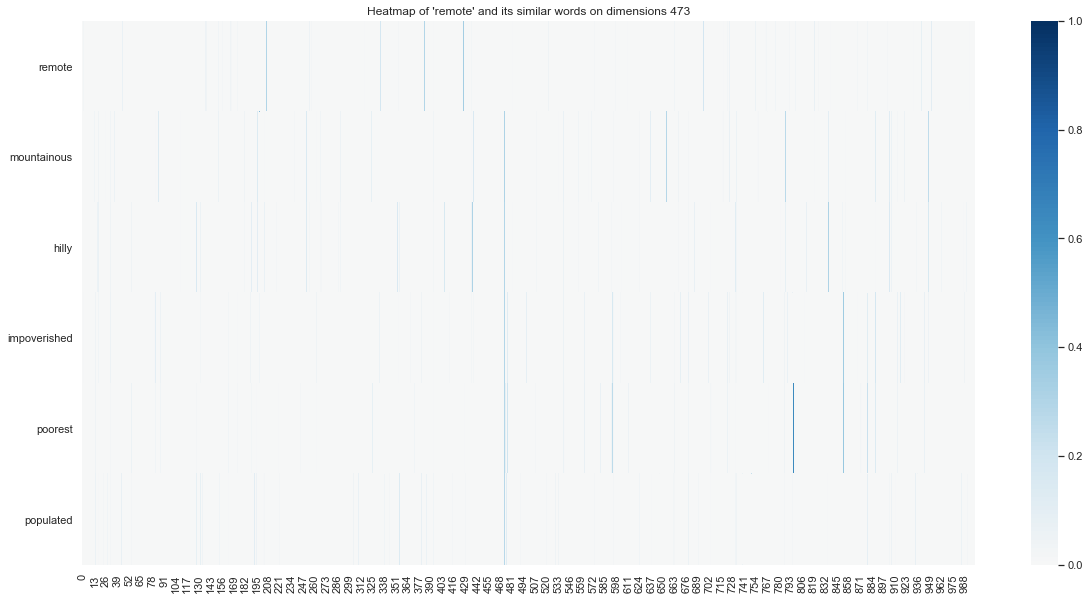

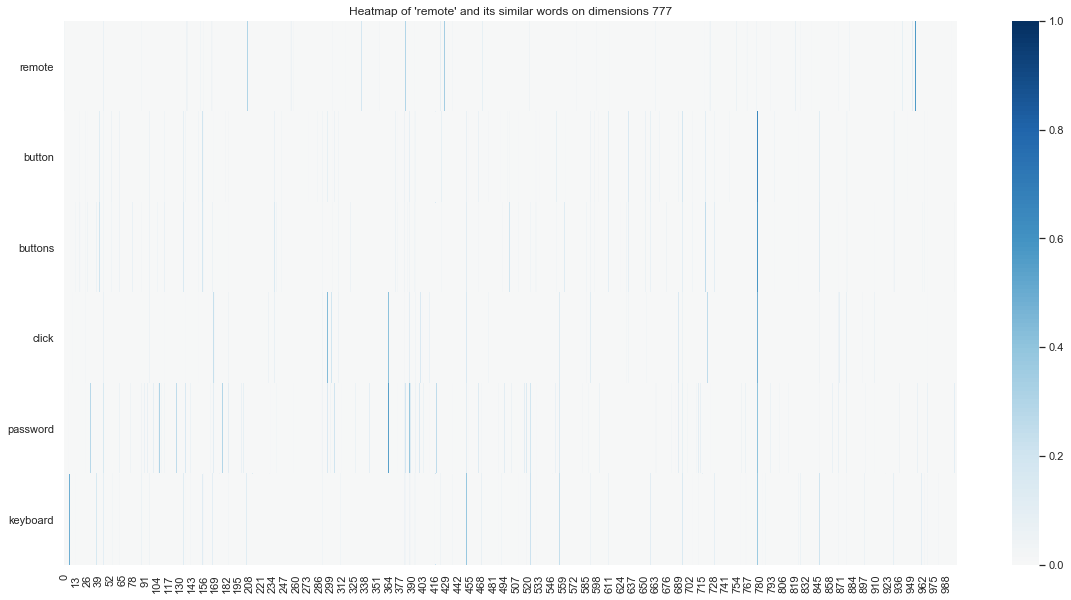

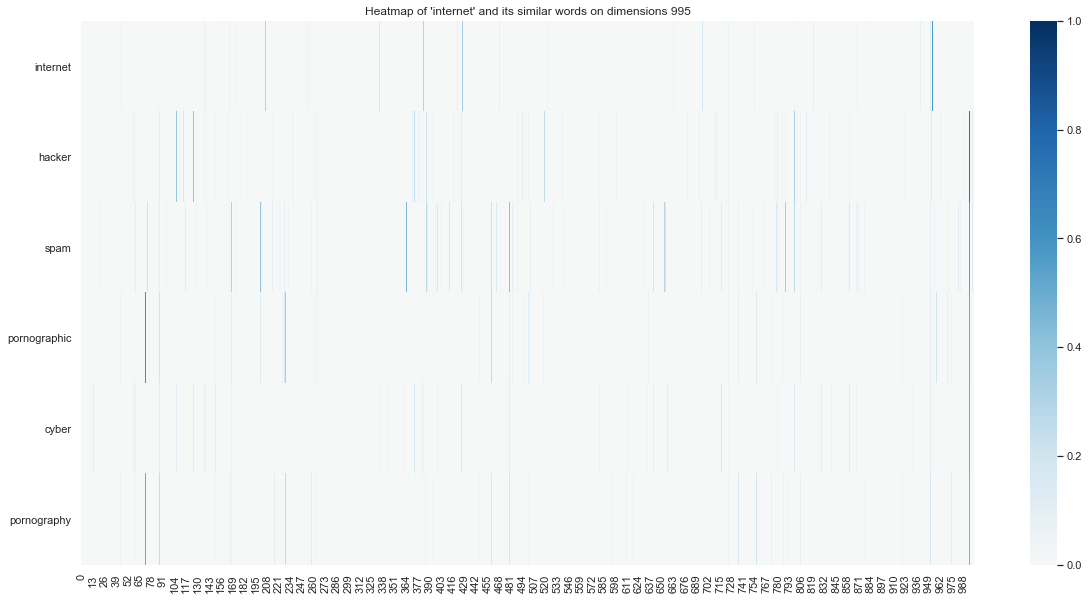

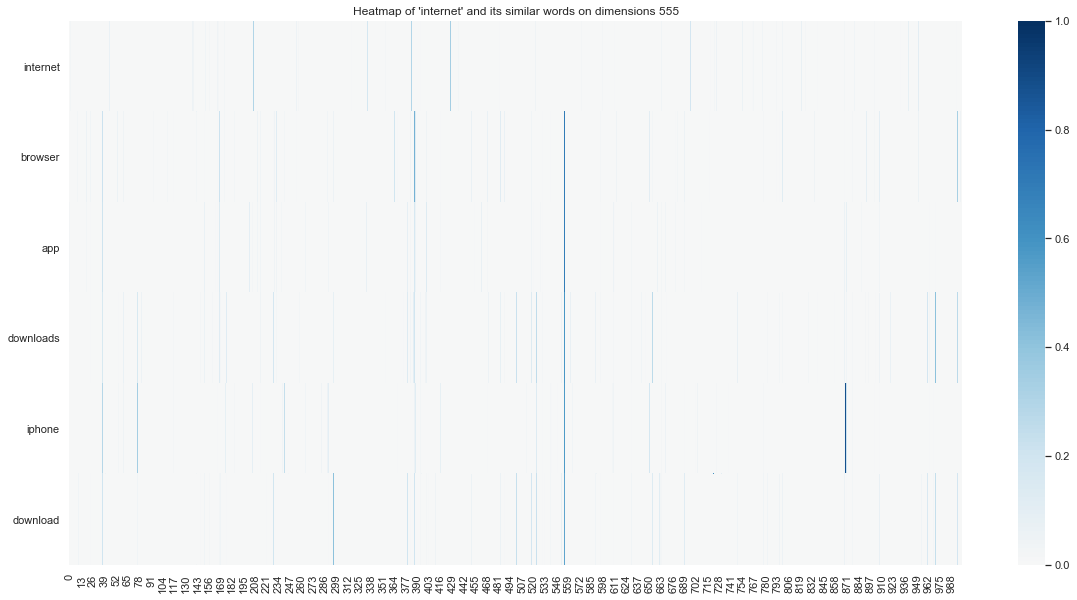

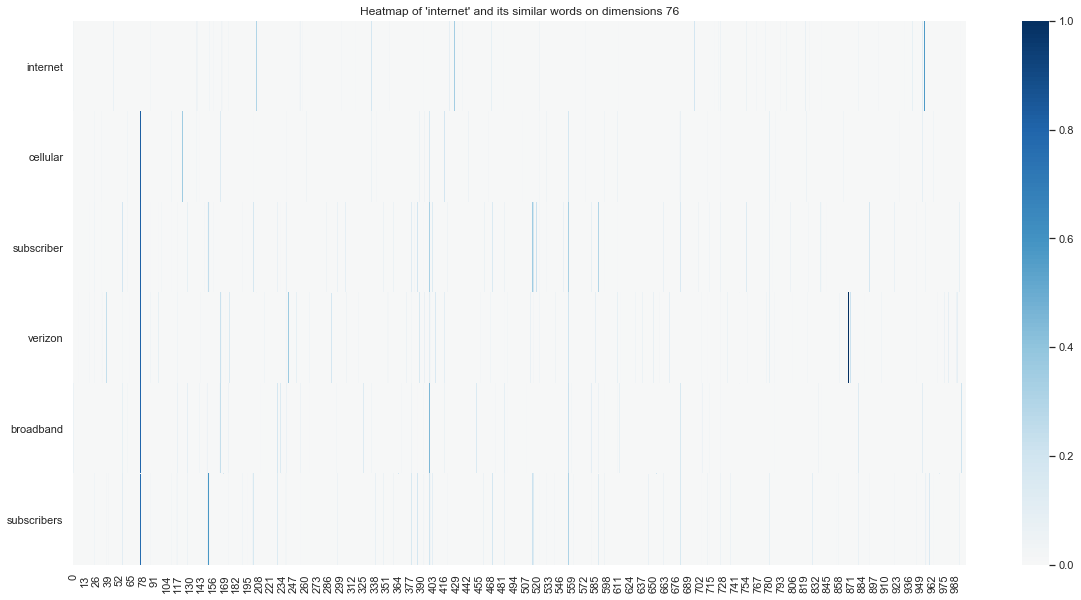

In [25]:
for targ_word, targ_word_embed in zip(targ_words, targ_embeddings):
    top_dim_inx, top_dim_inx_sign = find_top_dimension_inx(targ_word_embed)
    print("----")
    print("Embedding weight of the target word:", targ_word_embed[top_dim_inx])
    word_list = find_top_words(top_dim_inx, top_dim_inx_sign, spine_tokens, spine_embeddings, num_word = 5, toprint=True)
    for inx, cand_list in enumerate(word_list):
        check_targ_embed = np.array(targ_embeddings[0]).reshape(1,-1)
        check_embed = np.array([spine_embeddings[np.where(spine_tokens == word)[0][0]] for word in cand_list])

        fig, ax = plt.subplots(1,1,figsize = (20,10))
        sns.heatmap(np.vstack([check_targ_embed, check_embed]), vmin = 0, vmax = 1, ax=ax, cmap='RdBu', center = 0)
        labels = cand_list
        if targ_word not in labels:
            labels = np.insert(labels, 0, targ_word)
        ax.set_yticklabels(labels = labels, rotation = 'horizontal')
        ax.set_title(f"Heatmap of '{targ_word}' and its similar words on dimensions {top_dim_inx[inx]}")
#         plt.savefig(f"{targ_word}_cand_word_{inx}.png", bbox_inches='tight')

**After replicating the results for SPINE w/word2vec, we want to replicat the results on initial word2vec vectors, i.e., showing that individual dimensions in word2vec are not directly interpretable.**

## Original word2vec

In [26]:
## Using the original word2vec embeddings, but limit to the same 15000 token used in previous models
# 15000 tokens are the most common words identified according to the Leipzig corpus
word2vec_proc = open("../data/processed/word2vec_original_15k_300d_train.txt","r").read().split('\n')
word2vec_proc.pop(15000)

word2vec_proc_tokens = []
word2vec_proc_embeddings = []

for i, line in enumerate(word2vec_proc):
#     if i %100 == 0:
#         print("Processing:", i)
    tokens = line.strip().split()
    word2vec_proc_tokens.append(tokens[0])
    word2vec_proc_embeddings.append([float(i) for i in tokens[1:]])

In [27]:
word2vec_proc_embeddings = np.array(word2vec_proc_embeddings)
word2vec_proc_tokens = np.array(word2vec_proc_tokens)

In [28]:
targ_words = ['mathematics', 'remote', 'internet']
targ_word2vec_embeddings = [word2vec_proc_embeddings[np.where(word2vec_proc_tokens == word)[0][0]] for word in targ_words]
targ_word2vec_embeddings = np.array(targ_word2vec_embeddings)

In [29]:
print("Using individual dimension from word2vec embeddings")
for targ_word, targ_word_embed in zip(targ_words, targ_word2vec_embeddings):
    top_dim_inx, top_dim_inx_sign = find_top_dimension_inx(targ_word_embed, 5)
    word_list = find_top_words(top_dim_inx,top_dim_inx_sign, word2vec_proc_tokens, word2vec_proc_embeddings, num_word = 5)
    for mylist in word_list:
        print(f"{targ_word} is similar to: {mylist}")
    print("---")

Using individual dimension from word2vec embeddings
mathematics is similar to: ['leukemia' 'info' 'booker' 'recycling' 'cancer']
mathematics is similar to: ['ore' 'greens' 'badminton' 'hymns' 'clay']
mathematics is similar to: ['asylum' 'intercepted' 'skater' 'rb' 'flats']
mathematics is similar to: ['beetles' 'whaling' 'reproduce' 'whales' 'samples']
mathematics is similar to: ['separation' 'citizenship' 'suffix' 'knots' 'shortstop']
---
remote is similar to: ['basilica' 'sensory' 'ranger' 'chapel' 'memorials']
remote is similar to: ['sr' 'cruisers' 'propulsion' 'towed' 'hydraulic']
remote is similar to: ['capt' 'tents' 'jerseys' 'resumes' 'palestinians']
remote is similar to: ['microsoft' 'packers' 'adobe' 'miami' 'citrus']
remote is similar to: ['paramilitary' 'coup' 'explosives' 'logistical' 'tumor']
---
internet is similar to: ['befriends' 'degrees' 'bachelor' 'stabbing' 'interacts']
internet is similar to: ['gases' 'methane' 'graph' 'buttons' 'button']
internet is similar to: ['l

----
Embedding weight of the target word mathematics: [-0.460938  0.445312  0.431641]
word: ['leukemia' 'info' 'booker' 'recycling' 'cancer']
embedding score: [-0.785156 -0.664062 -0.644531 -0.640625 -0.640625]
word: ['ore' 'greens' 'badminton' 'hymns' 'clay']
embedding score: [0.84375  0.804688 0.769531 0.765625 0.761719]
word: ['asylum' 'intercepted' 'skater' 'rb' 'flats']
embedding score: [0.839844 0.773438 0.769531 0.757812 0.753906]
----
Embedding weight of the target word remote: [-0.632812 -0.421875  0.396484]
word: ['basilica' 'sensory' 'ranger' 'chapel' 'memorials']
embedding score: [-0.996094 -0.855469 -0.820312 -0.804688 -0.792969]
word: ['sr' 'cruisers' 'propulsion' 'towed' 'hydraulic']
embedding score: [-0.898438 -0.726562 -0.703125 -0.699219 -0.6875  ]
word: ['capt' 'tents' 'jerseys' 'resumes' 'palestinians']
embedding score: [0.855469 0.675781 0.632812 0.625    0.625   ]
----
Embedding weight of the target word internet: [0.466797 0.408203 0.369141]
word: ['befriends' 'd

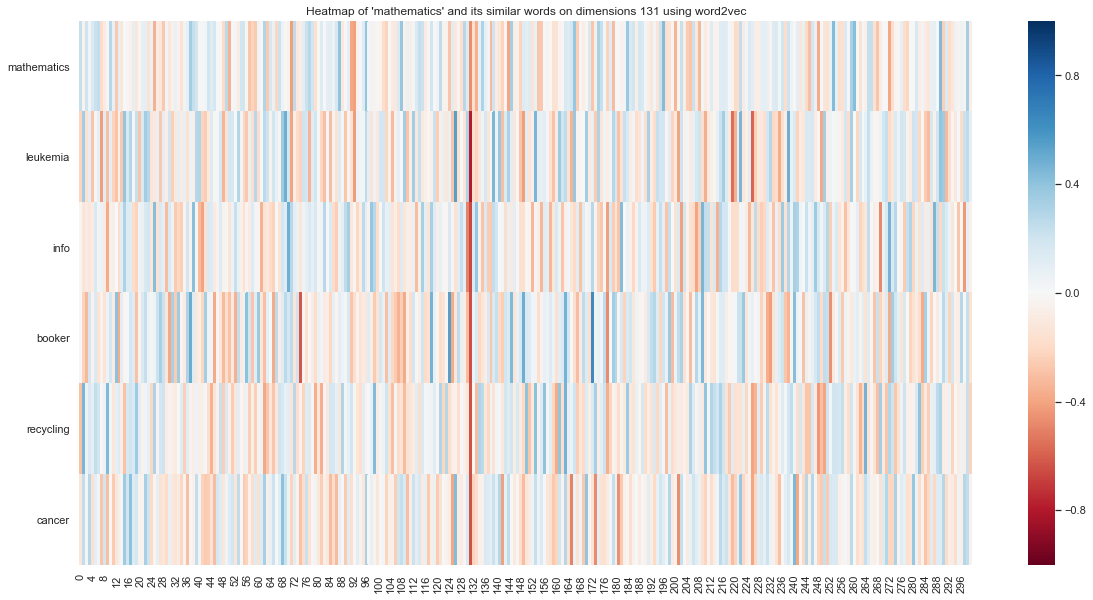

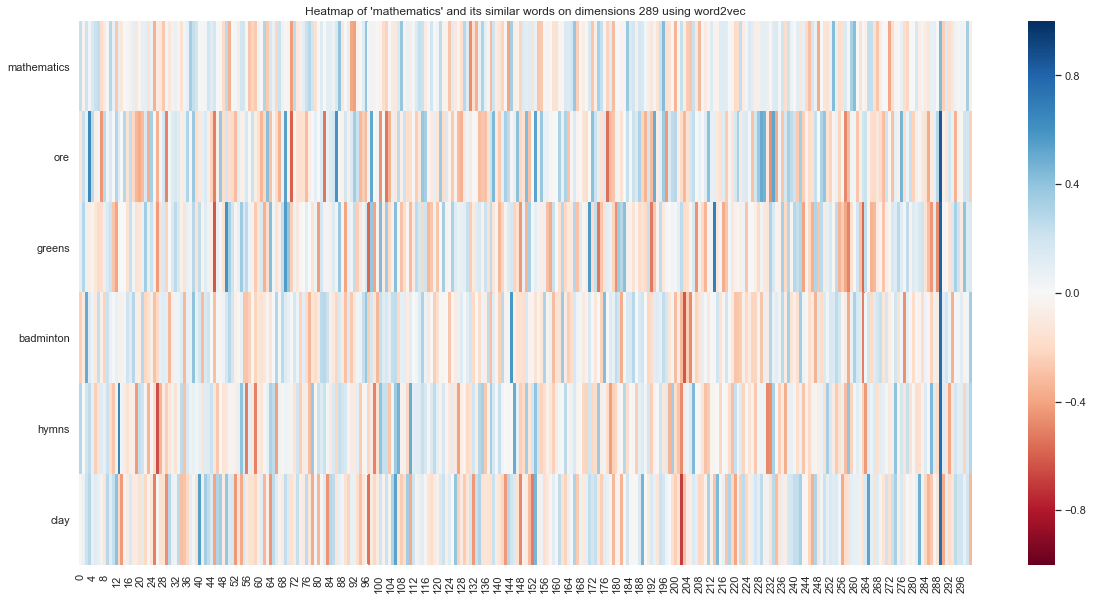

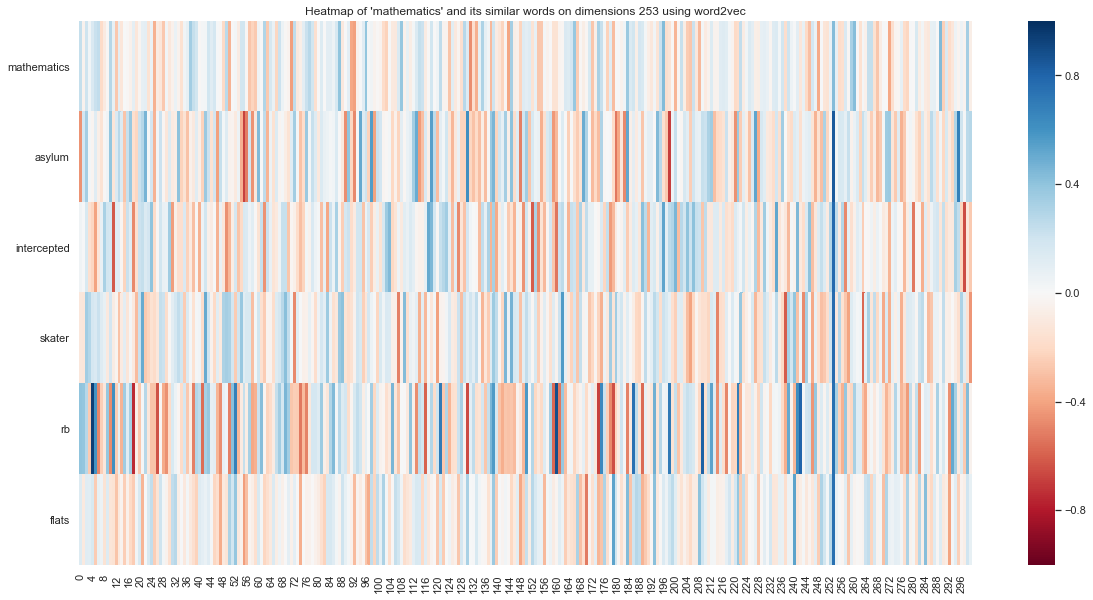

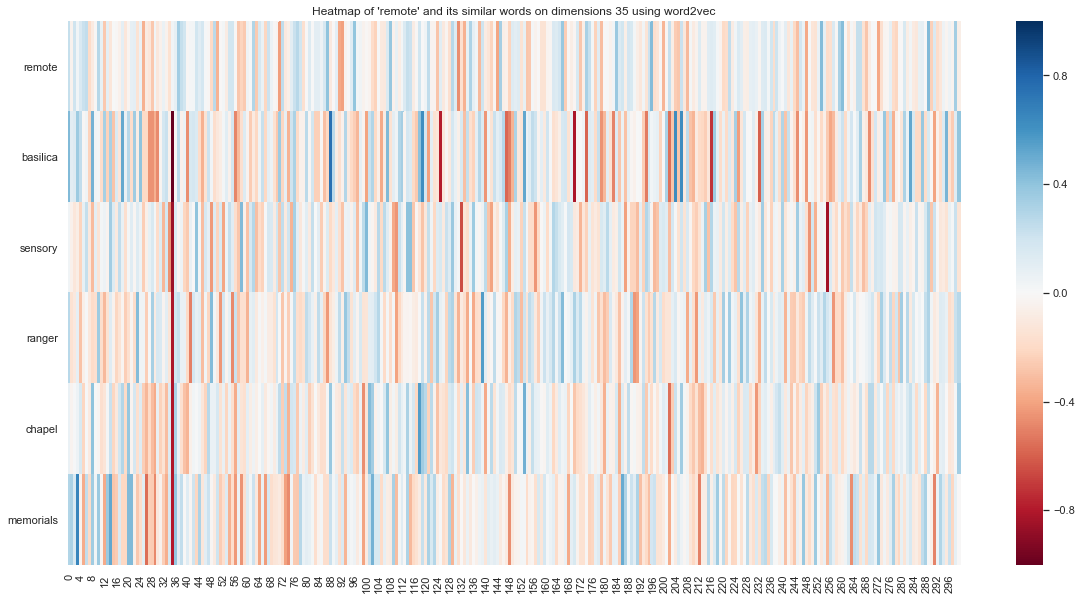

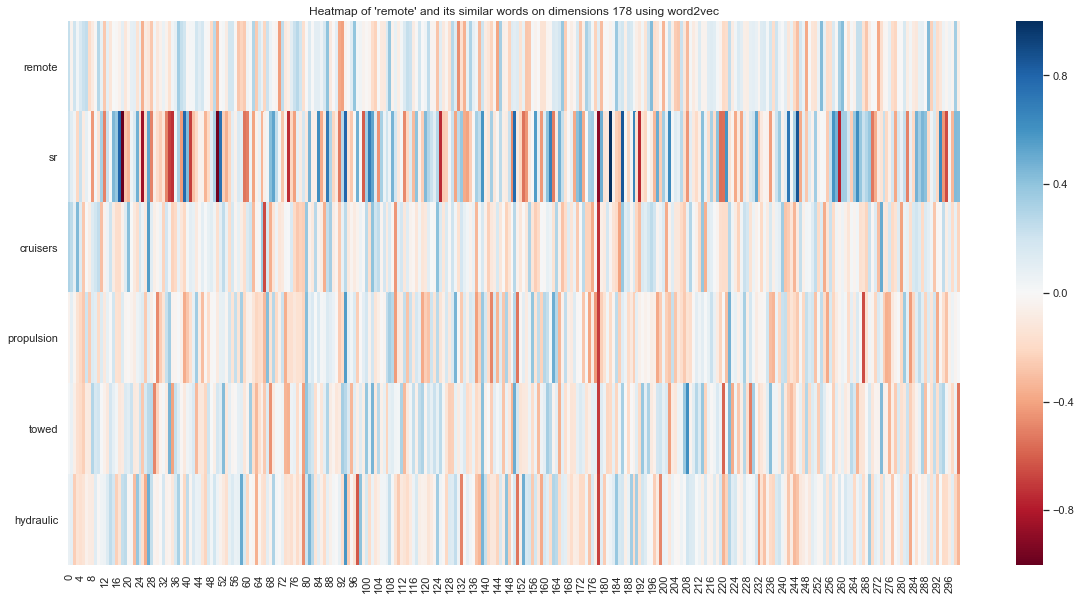

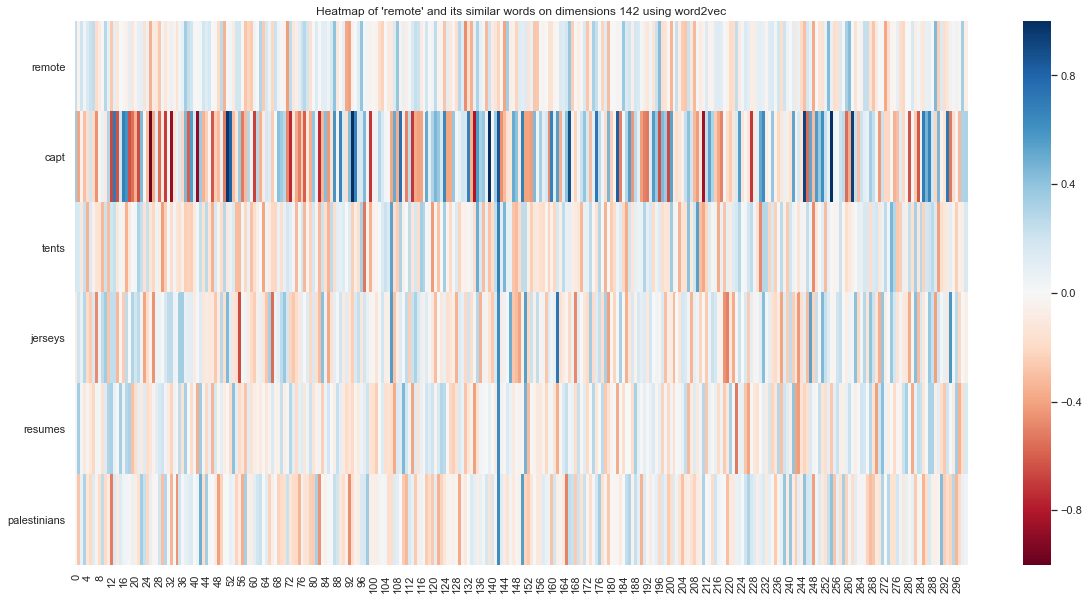

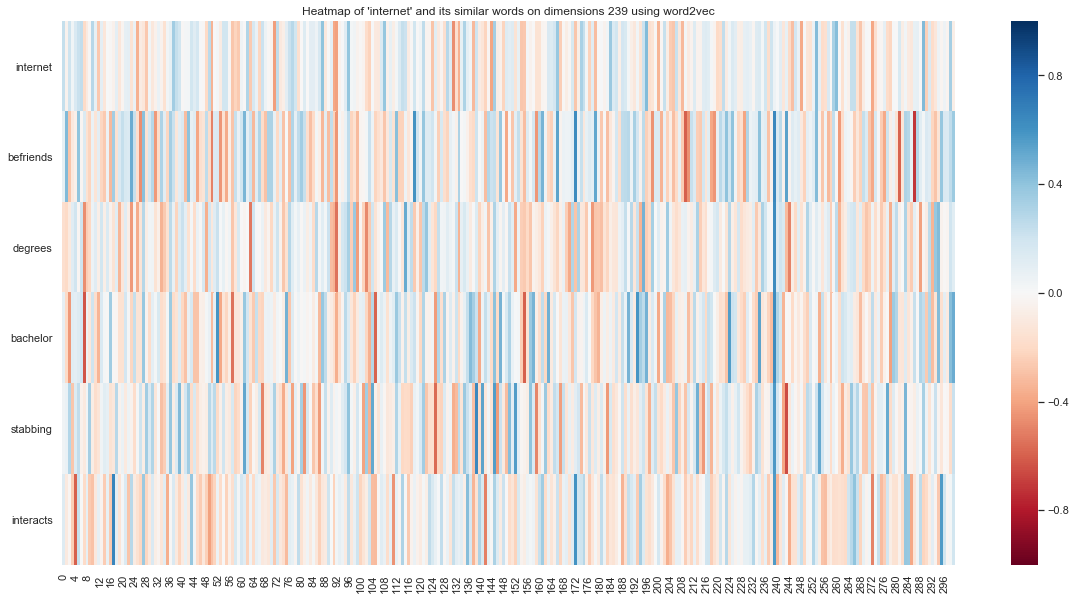

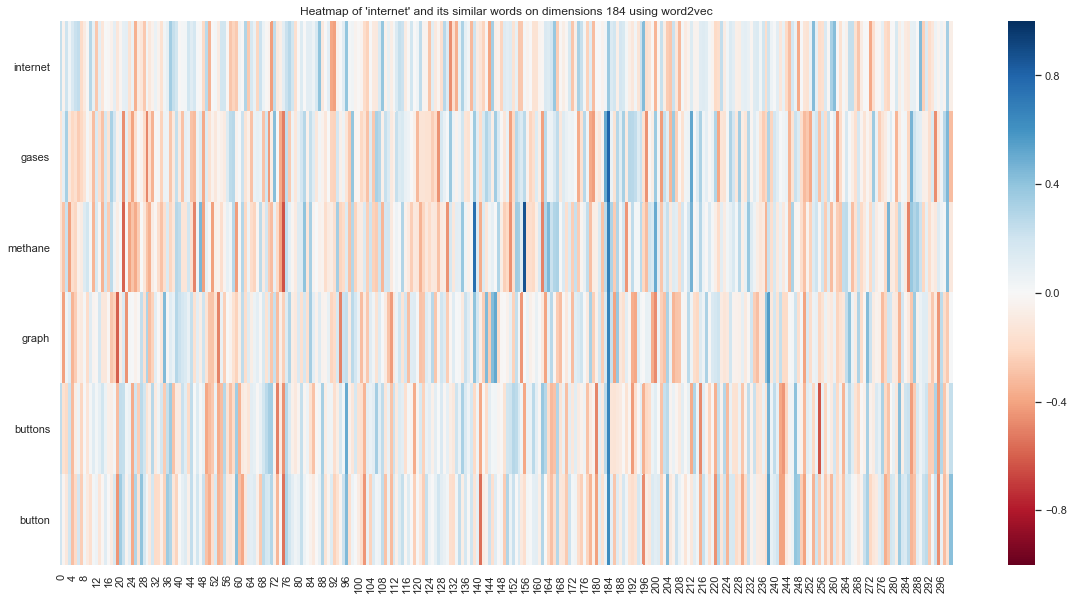

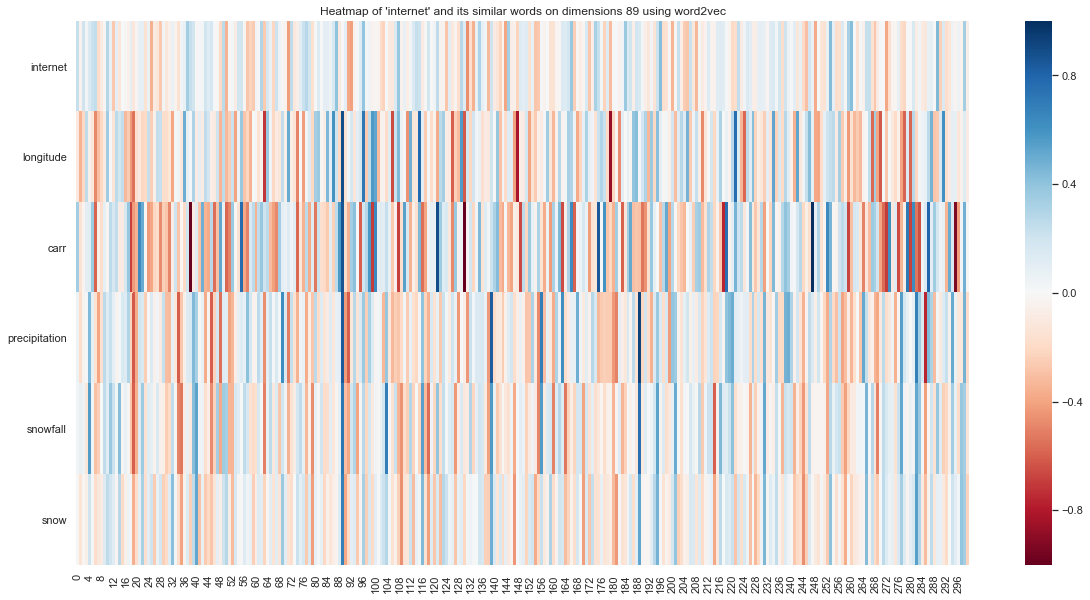

In [31]:
for targ_word, targ_word_embed in zip(targ_words, targ_word2vec_embeddings):
    top_dim_inx, top_dim_inx_sign = find_top_dimension_inx(targ_word_embed)
    print("----")
    print(f"Embedding weight of the target word {targ_word}: {targ_word_embed[top_dim_inx]}")
    word_list = find_top_words(top_dim_inx, top_dim_inx_sign, word2vec_proc_tokens, word2vec_proc_embeddings, num_word = 5, toprint=True)
    for inx, cand_list in enumerate(word_list):
        check_targ_embed = np.array(targ_word2vec_embeddings[0]).reshape(1,-1)
        check_embed = np.array([word2vec_proc_embeddings[np.where(word2vec_proc_tokens == word)[0][0]] for word in cand_list])

        fig, ax = plt.subplots(1,1,figsize = (20,10))
        sns.heatmap(np.vstack([check_targ_embed, check_embed]), ax=ax, vmin = -1, vmax = 1, cmap='RdBu', center = 0)
        labels = cand_list
        if targ_word not in labels:
            labels = np.insert(labels, 0, targ_word)
        ax.set_yticklabels(labels = labels, rotation = 'horizontal')
        ax.set_title(f"Heatmap of '{targ_word}' and its similar words on dimensions {top_dim_inx[inx]} using word2vec")
#         plt.savefig(f"{targ_word}_word2vec_cand_wordlist_{inx}.png", bbox_inches='tight')

**Explanation**

Using the word2vec embeddings obtained from Google code archive and the SPINE trained with word2vec, we were able to reproduce most of the results from Table 1. The minor discrepancy is likely due to cherry-picked tokens from certain dimensions.

We also want to note that from the two sets of heatmaps, we can see that SPINE is a much more sparse matrix (noted by the little color) compared to the original word2vec embeddings.